In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sys
import os
import torch.nn.functional as F
sys.path.append(os.path.abspath(".."))
from transformer.transformer_encoder import TransformerEncoder


In [54]:
torch.manual_seed(42)

In [59]:
#Model params
vocab_size = 100
d_model = 16
n_layers = 2
n_heads = 2
d_ff = 64
max_len = 50

encoder = TransformerEncoder(vocab_size,d_model,n_layers,n_heads,d_ff,max_len)

In [56]:
def get_batch(batch_sz=32,seq_len=10,vocab_size=100):
# generate synthetic dataset
    token_ids = torch.randint(0,vocab_size,(batch_sz,seq_len))
    return token_ids 

In [57]:
token_ids = get_batch(batch_sz=2,seq_len = 2,vocab_size = 100)
encoder_out = encoder(token_ids)
print(encoder_out)

print(f"Mean: {encoder_out.mean(dim=-1)}, STD: {encoder_out.std(dim=-1)}")

tensor([[[-1.7763,  1.2157, -1.1835,  1.0546,  0.0102,  2.0521, -0.9802,
           0.3938, -0.3479, -0.8427,  0.6350,  0.4212, -0.5822,  0.8628,
          -1.0125,  0.0799],
         [-1.4785, -0.6641, -0.8831,  1.1605,  0.7176,  0.2286, -1.9136,
           0.7040, -0.7483,  0.5234, -0.4824,  1.5153, -0.1459,  1.5437,
          -0.6516,  0.5743]],

        [[-1.3633,  0.4684, -1.1525,  2.0015,  0.6973, -0.1875, -0.0137,
           0.6338, -0.0948, -0.5888, -0.2070, -0.4675, -1.4259,  2.1949,
          -0.0550, -0.4400],
         [-0.5707,  0.8310, -1.6814,  1.0827, -0.1252, -1.6459,  0.2754,
          -0.3686, -1.1331,  1.3148,  1.1213,  0.3926, -1.3229,  0.9094,
          -0.0981,  1.0186]]], grad_fn=<NativeLayerNormBackward0>)
Mean: tensor([[ 1.3039e-08,  0.0000e+00],
        [-1.6764e-08, -7.4506e-09]], grad_fn=<MeanBackward1>), STD: tensor([[1.0328, 1.0328],
        [1.0328, 1.0328]], grad_fn=<StdBackward0>)


In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(encoder.parameters(),lr=1e-3)
num_epochs = 1000
loss_history=[]
output_proj = nn.Linear(d_model,vocab_size)
for epoch in range(num_epochs):
    encoder.train()
    token_ids = get_batch()

    # get targets from embedding
    with torch.no_grad():
        target_embeds = encoder.embedding(targets)

    logits = output_proj(encoder(token_ids))
    loss = criterion(logits.view(-1,vocab_size),token_ids.view(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if( epoch + 1 )%5 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 5/1000, Loss: 4.6965
Epoch 10/1000, Loss: 4.6409
Epoch 15/1000, Loss: 4.6370
Epoch 20/1000, Loss: 4.5491
Epoch 25/1000, Loss: 4.5109
Epoch 30/1000, Loss: 4.5338
Epoch 35/1000, Loss: 4.4585
Epoch 40/1000, Loss: 4.3690
Epoch 45/1000, Loss: 4.3783
Epoch 50/1000, Loss: 4.3033
Epoch 55/1000, Loss: 4.2454
Epoch 60/1000, Loss: 4.2996
Epoch 65/1000, Loss: 4.1703
Epoch 70/1000, Loss: 4.2098
Epoch 75/1000, Loss: 4.1627
Epoch 80/1000, Loss: 4.1918
Epoch 85/1000, Loss: 4.1542
Epoch 90/1000, Loss: 4.0964
Epoch 95/1000, Loss: 4.0964
Epoch 100/1000, Loss: 3.9941
Epoch 105/1000, Loss: 4.0424
Epoch 110/1000, Loss: 3.9687
Epoch 115/1000, Loss: 3.9188
Epoch 120/1000, Loss: 3.9565
Epoch 125/1000, Loss: 3.8526
Epoch 130/1000, Loss: 3.8544
Epoch 135/1000, Loss: 3.8347
Epoch 140/1000, Loss: 3.9027
Epoch 145/1000, Loss: 3.8178
Epoch 150/1000, Loss: 3.7857
Epoch 155/1000, Loss: 3.7855
Epoch 160/1000, Loss: 3.7667
Epoch 165/1000, Loss: 3.6831
Epoch 170/1000, Loss: 3.6792
Epoch 175/1000, Loss: 3.6398
Epoch

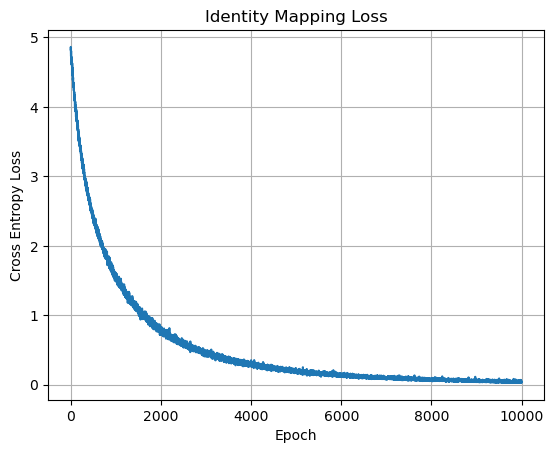

In [52]:
plt.plot(loss_history)
plt.title("Identity Mapping Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.grid(True)
plt.show()